# Loading and Cleaning Dataset

<h1>Installing libraries</h1>

In [35]:
!pip install mlxtend
!pip install tabulate

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


<h1>Importing the Libraries</h1>

In [36]:
import pandas as pd 
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules 

<h1> Ingesting the Data from the csv file --> Employee_skills_traits.csv </h1>


In [37]:
df_input_file = pd.read_csv("Employee_skills_traits.csv", header = 0)
df_input_file

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1


<h1>Removing the duplicates from the dataset</h1>


In [38]:
#Removing Duplilcate and considers considers last value as unique and rest of the same values as duplicate.
df_input_file.drop_duplicates(subset='ID', keep='last', inplace=True)
df_input_file

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1


In [39]:
df_input_file.columns

Index(['ID', 'Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative '],
      dtype='object')

In [40]:
df_input_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   ID                                     974 non-null    int64
 1   Employment period                      974 non-null    int64
 2   Time in current department             974 non-null    int64
 3   Gender                                 974 non-null    int64
 4   Team leader                            974 non-null    int64
 5   Age                                    974 non-null    int64
 6   Member of professional organizations   974 non-null    int64
 7   .Net                                   974 non-null    int64
 8   SQL Server                             974 non-null    int64
 9   HTML CSS Java Script                   974 non-null    int64
 10  PHP mySQL                              974 non-null    int64
 11  Fast working                    

In [41]:
print(df_input_file.isnull().sum())

ID                                       0
Employment period                        0
Time in current department               0
Gender                                   0
Team leader                              0
Age                                      0
Member of professional organizations     0
.Net                                     0
SQL Server                               0
HTML CSS Java Script                     0
PHP mySQL                                0
Fast working                             0
Awards                                   0
Communicative                            0
dtype: int64


In [42]:
#Drop the row with Nan
df_input_file = df_input_file.dropna()

In [43]:
df_input_file

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1


In [44]:
sns.set(rc={'figure.figsize':(20,5)})

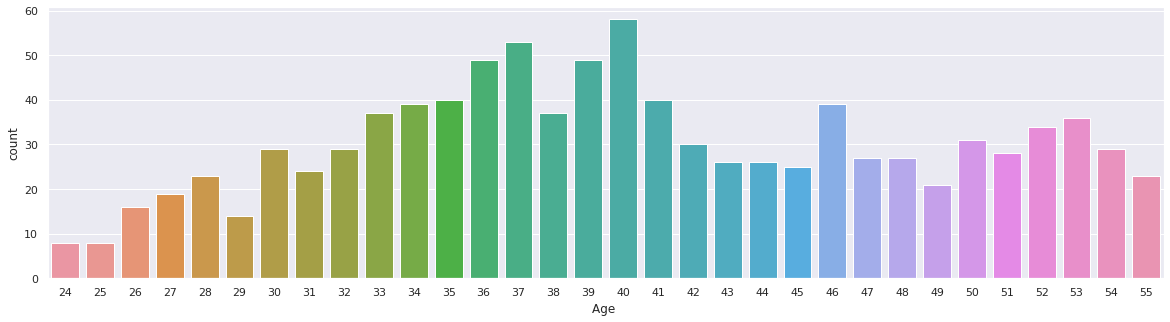

In [45]:
age = sns.countplot(x="Age ", data=df_input_file)

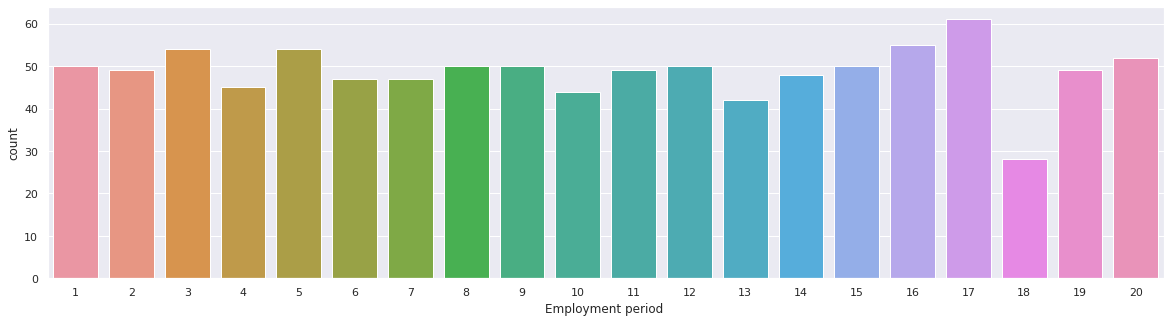

In [46]:
emp = sns.countplot(x="Employment period ", data=df_input_file)

In [47]:
sns.set(rc={'figure.figsize':(6,6)})

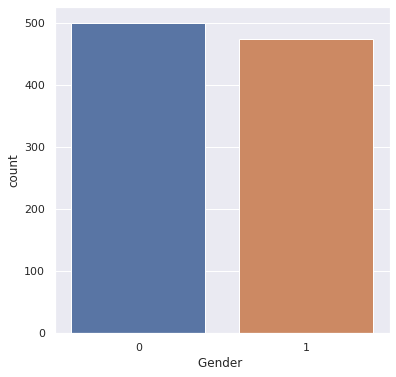

In [48]:
age = sns.countplot(x="Gender ", data=df_input_file)

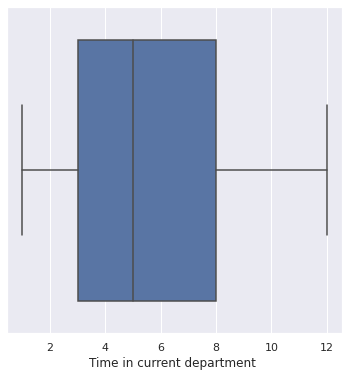

In [49]:
sns.boxplot(x=df_input_file['Time in current department '])

In [50]:
list_Of_Columns = list(df_input_file.columns.values)
df_skills = df_input_file

<h2>Cleaning the dataset df_skills</h2>

In [51]:

#Cleaning technical skills like- .Net, etc
for i in range(len(df_skills)):
    for j in range(6, len(df_skills.columns.values)):
        a = list_Of_Columns[j].strip()
        if df_skills.iloc[i, j] == 1.0:
            df_skills.iloc[i, j] = a
        else:
            df_skills.iloc[i, j] = "None" 


# cleaning column gender
# Assume 0 as male and 1 as female
for i in range(len(df_skills)):
    if df_skills.iloc[i, 3] == 1.0:
        df_skills.iloc[i, 3] = "Female"
    else:
        df_skills.iloc[i, 3] = "Male" 


#cleaning column Team leader
for i in range(len(df_skills)):
    if df_skills.iloc[i, 4] == 1.0:
        df_skills.iloc[i, 4] = "Team leader"
    else:
        df_skills.iloc[i, 4] = "None" 


#cleaning column age
for i in range(len(df_skills)):
    if df_skills.iloc[i, 5] <= 35.0:
        df_skills.iloc[i, 5] = "Young Adult"
    elif (df_skills.iloc[i, 5] > 35.0) and (df_input_file.iloc[i, 5] < 50.0) :
        df_skills.iloc[i, 5] = "Middle-aged Adult" 
    else:
        df_skills.iloc[i, 5] = "Old-aged Adult" 


#cleaning column employment period
for i in range(len(df_skills)):
    if df_skills.iloc[i, 1] <= 4.0:
        df_skills.iloc[i, 1] = "Junior-level employee"
    elif (df_skills.iloc[i, 1] > 4.0) and (df_skills.iloc[i, 1] < 16.0) :
        df_skills.iloc[i, 1] = "Mid-level employee"
    else:
        df_input_file.iloc[i, 1] = "Senior-level employee" 


#cleaning column Period in current Department
for i in range(len(df_skills)):
    if df_skills.iloc[i, 2] <= 3.0:
        df_skills.iloc[i, 2] = "New in current Dept."
    else:
        df_skills.iloc[i, 2] = "Old in current Dept." 


<h1>Selecting the columns from the dataset which are required</h1> <br> <h2>Feature Selection</h2>

In [52]:
df_skills = df_skills.iloc[ : , 1:]
df_skills

,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,Mid-level employee,Old in current Dept.,Male,Team leader,Middle-aged Adult,Member of professional organizations,.Net,SQL Server,None,PHP mySQL,Fast working,None,Communicative
1,Mid-level employee,New in current Dept.,Female,Team leader,Young Adult,Member of professional organizations,.Net,None,None,PHP mySQL,Fast working,None,None
2,Mid-level employee,Old in current Dept.,Male,None,Young Adult,None,None,SQL Server,HTML CSS Java Script,None,Fast working,None,Communicative
3,Mid-level employee,Old in current Dept.,Female,Team leader,Young Adult,Member of professional organizations,None,SQL Server,None,PHP mySQL,Fast working,Awards,None
4,Senior-level employee,Old in current Dept.,Male,None,Middle-aged Adult,None,None,None,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Mid-level employee,New in current Dept.,Female,Team leader,Young Adult,Member of professional organizations,None,None,None,PHP mySQL,Fast working,None,Communicative
994,Senior-level employee,Old in current Dept.,Female,None,Middle-aged Adult,Member of professional organizations,.Net,SQL Server,None,None,None,Awards,Communicative
995,Mid-level employee,Old in current Dept.,Male,Team leader,Young Adult,Member of professional organizations,None,SQL Server,None,PHP mySQL,Fast working,None,None
996,Mid-level employee,Old in current Dept.,Female,None,Middle-aged Adult,None,None,SQL Server,None,None,None,Awards,Communicative


In [53]:
print(df_skills.isnull().sum())

Employment period                        0
Time in current department               0
Gender                                   0
Team leader                              0
Age                                      0
Member of professional organizations     0
.Net                                     0
SQL Server                               0
HTML CSS Java Script                     0
PHP mySQL                                0
Fast working                             0
Awards                                   0
Communicative                            0
dtype: int64


In [54]:
sns.set(rc={'figure.figsize':(8,6)})

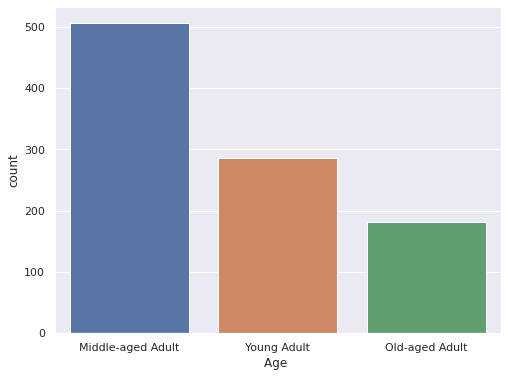

In [55]:
age = sns.countplot(x="Age ", data=df_skills)

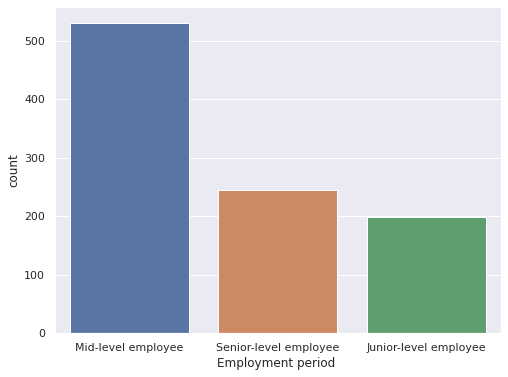

In [56]:
emp = sns.countplot(x="Employment period ", data=df_skills)

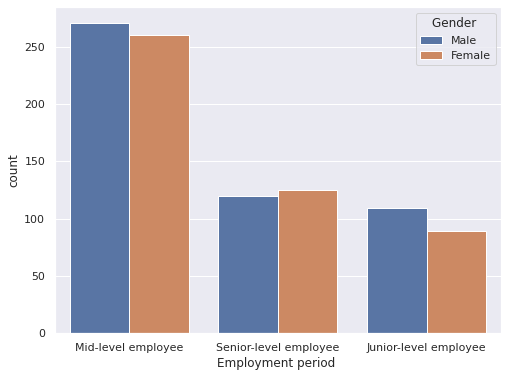

In [57]:

age = sns.countplot(x="Employment period ", hue="Gender ", data=df_skills)

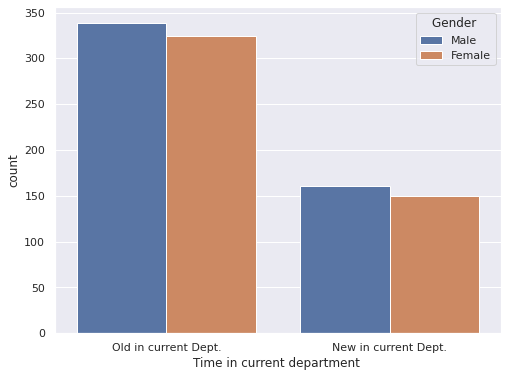

In [58]:
time = sns.countplot(x="Time in current department ", hue= "Gender ", data=df_skills)

# On Gender Analysis

<h1>Subsetting the original Dataframe "df_skills" for analysis</h1>
<h2> Two subset-datasets are "df_gender_pos" and "df_gender_skill" </h2>

In [59]:

df_gender_pos = df_skills[ ['Employment period ', 'Time in current department ', 'Gender ', 'Team leader ', 'Age ', 'Member of professional organizations '] ]
df_gender_skill = df_skills[ ['Gender ', '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ', 'Fast working', 'Awards', 'Communicative '] ]

<h1>Functions for finding Frequent Itemsets and formulating the Association Rules</h1>

In [60]:
def transform_toarray( dataframe ):
    transactions = []
    for i in range(len(dataframe)):
        one_record = []
        for j in range(len(dataframe.columns)):
            cell = str(dataframe.iloc[i,j])
            #print(cell)
            if cell == 'None':
                pass
            else:
                one_record.append(cell)
                #print(one_record)
        transactions.append(one_record)
    te = TransactionEncoder()
    df = pd.DataFrame(te.fit(transactions).transform(transactions), columns=te.columns_)
    return df

In [61]:
def print_asso_rules(df_associa_rules, flag_gen):
    #print(flag_gen)
    j = 1
    print('\n\n\n========================================================================================\n \
                        Association Rules are as follows: \
          \n========================================================================================\n\n')
    for i in range(len(df_associa_rules)):
        if flag_gen:
            if tuple(df_associa_rules.iloc[i, 0]).__contains__('Male') or tuple(df_associa_rules.iloc[i,1]).__contains__('Female'):
                print("Rule: ", j)
                print("========================================================================================")
                print(  tuple(df_associa_rules.iloc[i, 0]), " ==> ", tuple(df_associa_rules.iloc[i,1]) )
                print("Support: ", df_associa_rules.iloc[i, 2])
                print("Confidence: ", df_associa_rules.iloc[i, 3])
                print("Lift: ", df_associa_rules.iloc[i, 4], "\n")
                j += 1
        else:
            print("Rule: ", j)
            print("========================================================================================")
            print(  tuple(df_associa_rules.iloc[i, 0]), " ==> ", tuple(df_associa_rules.iloc[i,1]) )
            print("Support: ", df_associa_rules.iloc[i, 2])
            print("Confidence: ", df_associa_rules.iloc[i, 3])
            print("Lift: ", df_associa_rules.iloc[i, 4], "\n")
            j += 1
        

In [62]:
def print_frequent_itemsets( frequent_itemsets , flag_gen):
    #print(flag_gen)
    print('\n\n========================================================================================\n\
                            Frequent Itemsets are as follows:')
    print('========================================================================================')
    print('  Support         |            Itemsets')
    print('========================================================================================\n')
    for i in range(len(frequent_itemsets)):
        if flag_gen:
            if tuple(frequent_itemsets.iloc[i, 1]).__contains__('Male') or tuple(frequent_itemsets.iloc[i,1]).__contains__('Female'):
                print( round(frequent_itemsets.iloc[i, 0] , 10 ), "          ", tuple(frequent_itemsets.iloc[i, 1]) )
        else:
            print( round(frequent_itemsets.iloc[i, 0] , 10 ), "          ", tuple(frequent_itemsets.iloc[i, 1]) )


In [63]:
def generate_freq_asso_rules( dataframe,  min_sup, lift , flag_gen):
    #transforming dataframe
    df = transform_toarray( dataframe )

    #Apriori Algorithm for training Model
    frequent_itemsets = apriori(df, min_support= min_sup, use_colnames=True).nlargest(n = 100, columns = "support")
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

    #printing frequent itemsets
    print_frequent_itemsets(frequent_itemsets, flag_gen)

    #Getting the Association Rules
    rules = association_rules(frequent_itemsets , metric ="lift", min_threshold = lift ).sort_values(by = 'lift', ascending=False) 
    df_associa_rules = rules.loc[:, [ 'antecedents', 'consequents', 'support', 'confidence', 'lift']] 

    #printing the association rules
    print_asso_rules(df_associa_rules, flag_gen)

<h1>Frequent Itemsets and formulating the Association Rules with min. support of 0.2 and lift of 1</h1>

In [64]:
generate_freq_asso_rules(df_gender_skill, 0.2, 1, True)



                            Frequent Itemsets are as follows:
  Support         |            Itemsets

0.5133470226            ('Male',)
0.4866529774            ('Female',)
0.272073922            ('Fast working', 'Male')
0.2689938398            ('Communicative', 'Male')
0.2618069815            ('HTML CSS Java Script', 'Male')
0.2546201232            ('Awards', 'Male')
0.2525667351            ('Male', 'SQL Server')
0.2515400411            ('.Net', 'Male')
0.250513347            ('Female', 'Awards')
0.249486653            ('Female', 'Communicative')
0.2474332649            ('Female', 'PHP mySQL')
0.2453798768            ('Female', 'HTML CSS Java Script')
0.2320328542            ('Female', 'Fast working')
0.227926078            ('PHP mySQL', 'Male')
0.2258726899            ('Female', '.Net')
0.2207392197            ('Female', 'SQL Server')



                         Association Rules are as follows:           


Rule:  1
('PHP mySQL',)  ==>  ('Female',)
Support:  0.24743326488706366
Co

In [65]:
generate_freq_asso_rules(df_gender_pos,  0.2 , 1, True)



                            Frequent Itemsets are as follows:
  Support         |            Itemsets

0.5133470226            ('Male',)
0.4866529774            ('Female',)
0.3480492813            ('Old in current Dept.', 'Male')
0.3326488706            ('Female', 'Old in current Dept.')
0.2782340862            ('Mid-level employee', 'Male')
0.2741273101            ('Middle-aged Adult', 'Male')
0.2669404517            ('Female', 'Mid-level employee')
0.2525667351            ('Female', 'Team leader')
0.2525667351            ('Team leader', 'Male')
0.250513347            ('Member of professional organizations', 'Male')
0.2464065708            ('Female', 'Middle-aged Adult')
0.2351129363            ('Female', 'Member of professional organizations')
0.2217659138            ('Old in current Dept.', 'Mid-level employee', 'Male')
0.2166324435            ('Female', 'Old in current Dept.', 'Mid-level employee')
0.2032854209            ('Old in current Dept.', 'Middle-aged Adult', 'Male')



 

<h1>Changing Parameters</h1>

<h1>Frequent Itemsets and formulating the Association Rules with min. support of 0.26 and lift of 1</h1>

In [66]:
generate_freq_asso_rules(df_gender_skill, 0.26, 1, True)



                            Frequent Itemsets are as follows:
  Support         |            Itemsets

0.5133470226            ('Male',)
0.4866529774            ('Female',)
0.272073922            ('Fast working', 'Male')
0.2689938398            ('Communicative', 'Male')
0.2618069815            ('HTML CSS Java Script', 'Male')



                         Association Rules are as follows:           


Rule:  1
('Male',)  ==>  ('Fast working',)
Support:  0.2720739219712526
Confidence:  0.53
Lift:  1.0513645621181265 

Rule:  2
('Male',)  ==>  ('Communicative',)
Support:  0.26899383983572894
Confidence:  0.524
Lift:  1.0106455445544555 

Rule:  3
('Male',)  ==>  ('HTML CSS Java Script',)
Support:  0.2618069815195072
Confidence:  0.5100000000000001
Lift:  1.0055465587044536 



In [67]:
generate_freq_asso_rules(df_gender_pos,  0.26 , 1, True)



                            Frequent Itemsets are as follows:
  Support         |            Itemsets

0.5133470226            ('Male',)
0.4866529774            ('Female',)
0.3480492813            ('Old in current Dept.', 'Male')
0.3326488706            ('Female', 'Old in current Dept.')
0.2782340862            ('Mid-level employee', 'Male')
0.2741273101            ('Middle-aged Adult', 'Male')
0.2669404517            ('Female', 'Mid-level employee')



                         Association Rules are as follows:           


Rule:  1
('Male',)  ==>  ('Middle-aged Adult',)
Support:  0.2741273100616016
Confidence:  0.534
Lift:  1.0258698224852072 

Rule:  2
('Mid-level employee',)  ==>  ('Female',)
Support:  0.2669404517453799
Confidence:  0.4896421845574388
Lift:  1.0061423792382813 

Rule:  3
('Old in current Dept.',)  ==>  ('Female',)
Support:  0.3326488706365503
Confidence:  0.48868778280542985
Lift:  1.0041812245833095 



# Overall analysis of org.

<h1>Association Rules - using original dataset "df_skills"</h1>
<h2>Frequent Itemsets and formulating the Association Rules with min. support of 0.2 and lift of 1</h2>

In [68]:
generate_freq_asso_rules(df_skills,  0.2 , 1, False)



                            Frequent Itemsets are as follows:
  Support         |            Itemsets

0.680698152            ('Old in current Dept.',)
0.545174538            ('Mid-level employee',)
0.5205338809            ('Middle-aged Adult',)
0.5184804928            ('Communicative',)
0.5133470226            ('Male',)
0.5071868583            ('HTML CSS Java Script',)
0.5051334702            ('Awards',)
0.5051334702            ('Team leader',)
0.5041067762            ('Fast working',)
0.4866529774            ('Female',)
0.4856262834            ('Member of professional organizations',)
0.477412731            ('.Net',)
0.4753593429            ('PHP mySQL',)
0.4733059548            ('SQL Server',)
0.4383983573            ('Old in current Dept.', 'Mid-level employee')
0.3665297741            ('Old in current Dept.', 'Middle-aged Adult')
0.3613963039            ('Old in current Dept.', 'Fast working')
0.3531827515            ('Old in current Dept.', 'Communicative')
0.3480492813        